# 價差Alpha策略

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('seaborn')

# 1. 首先第一步獲取資料!-利用pandas data-reader

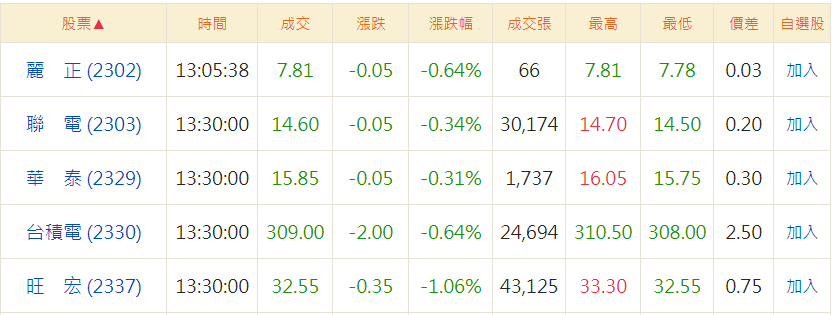

## 1-1. 設定與處理

In [2]:

start_day='2010-01-01'
end_day='2020-12-31'

company_list=['麗正','聯電','華泰','台積電','旺宏']
code_list=['2302','2303','2329','2330','2337']

## 1-2. 抓資料

In [12]:
#讀入data
for company,code in zip(company_list,code_list):
    print(company,code)
    globals()[company]=web.DataReader(name='{}.tw'.format(code),data_source='yahoo',start=start_day,end=end_day)
    ## 修正全域變數的 dict，直接定義
print('End')

麗正 2302
聯電 2303
華泰 2329
台積電 2330
旺宏 2337
End


In [ ]:
麗正.head()

In [13]:
## 組合adj close df
adj_close_list=[]
for company in company_list:
    adj_close_list.append(globals()[company]['Adj Close'])
close_df=pd.concat(adj_close_list,axis=1,keys=code_list,join='inner')

## inner只抓重疊index刪除

In [14]:
close_df

,2302,2303,2329,2330,2337
Date,,,,,
2010-01-04,6.222883,10.645722,17.125622,44.052135,26.497847
2010-01-05,5.975026,10.770967,16.549990,43.780632,26.203426
2010-01-06,6.054688,11.522430,16.334118,44.052135,26.350639
2010-01-07,5.842247,11.522430,16.406109,43.576996,25.982613
2010-01-08,5.824543,11.397185,16.693874,43.441250,25.835400
2010-01-11,5.851098,11.647675,16.334118,43.780632,25.614582
2010-01-12,5.895354,11.491119,16.549990,43.169735,26.497847
2010-01-13,5.886503,11.178008,15.974360,42.626728,26.350639
2010-01-14,6.090103,11.240632,16.693874,42.898228,26.350639


# 2. 選取公司

#### <註4> 相關係數矩陣

In [15]:
close_df.corr(method='pearson')

,2302,2303,2329,2330,2337
2302,1.000000,0.696508,0.506637,0.663105,0.341902
2303,0.696508,1.000000,0.193317,0.838439,0.521993
2329,0.506637,0.193317,1.000000,0.279481,-0.120967
2330,0.663105,0.838439,0.279481,1.000000,0.392992
2337,0.341902,0.521993,-0.120967,0.392992,1.000000


In [16]:
close_df.corr(method='kendall')

,2302,2303,2329,2330,2337
2302,1.000000,0.432802,0.391683,0.388946,0.197571
2303,0.432802,1.000000,0.278579,0.558441,0.321881
2329,0.391683,0.278579,1.000000,0.214751,-0.106367
2330,0.388946,0.558441,0.214751,1.000000,0.036007
2337,0.197571,0.321881,-0.106367,0.036007,1.000000


In [17]:
close_df.corr(method='spearman')

,2302,2303,2329,2330,2337
2302,1.000000,0.603171,0.547163,0.547236,0.304826
2303,0.603171,1.000000,0.416107,0.747626,0.484694
2329,0.547163,0.416107,1.000000,0.420548,-0.236738
2330,0.547236,0.747626,0.420548,1.000000,0.177873
2337,0.304826,0.484694,-0.236738,0.177873,1.000000


#### <註5> heatmap

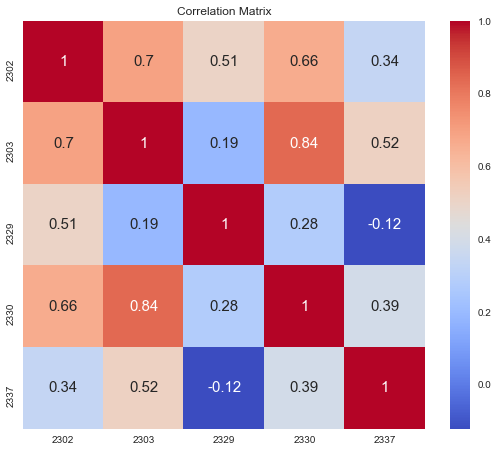

In [18]:
## 計算相關係數
import seaborn as sns

plt.figure(figsize=(9,7.5))
plt.title('Correlation Matrix')
sns.heatmap(close_df.corr(),annot=True,annot_kws={"size":15},cmap='coolwarm')
plt.show()

## 2-1. 差分後相關係數

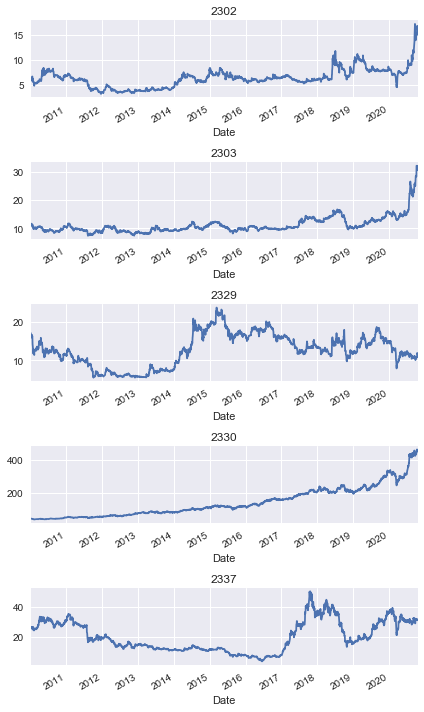

In [19]:
plt.figure(figsize=(6,10))
for col in close_df:
    plt.subplot(5,1,close_df.columns.to_list().index(col)+1)
    plt.title(col)
    close_df[col].plot()
plt.tight_layout()

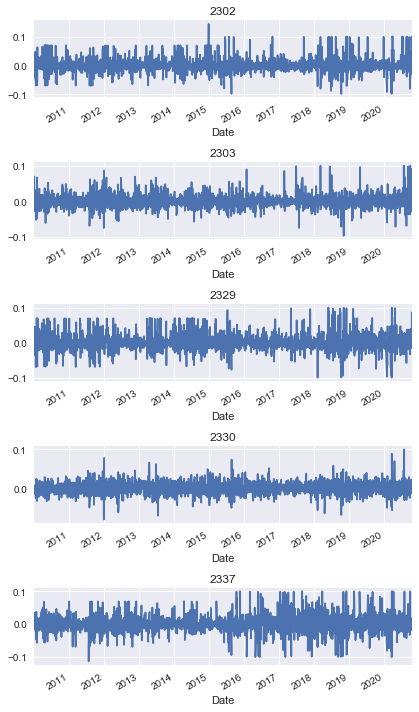

In [20]:
plt.figure(figsize=(6,10))
for col in close_df:
    plt.subplot(5,1,close_df.columns.to_list().index(col)+1)
    plt.title(col)
    close_df[col].pct_change(periods=1,fill_method="ffill").plot()
plt.tight_layout()

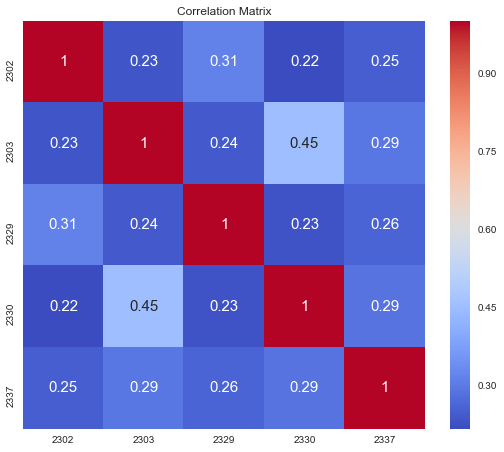

In [21]:
## 解決trend，做一階差分

plt.figure(figsize=(9,7.5))
plt.title('Correlation Matrix');
sns.heatmap(close_df.pct_change(periods=1,fill_method="ffill").corr(),annot=True,annot_kws={"size":15},cmap='coolwarm')
plt.show()

## 3. 價差比例

In [24]:
stock_1='2302'
stock_2='2329'

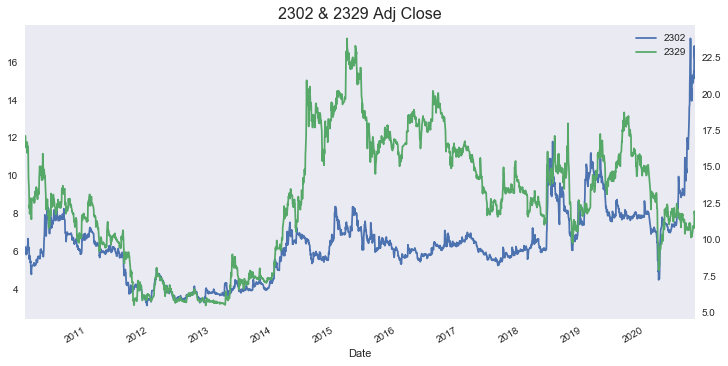

In [26]:
plt.figure(figsize=(12,6))
plt.title('{} & {} Adj Close'.format(stock_1,stock_2),fontsize=16)

ax1 = close_df[stock_1].plot()
ax2 = close_df[stock_2].plot(secondary_y=True)

plt.grid()

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines,[l.get_label() for l in lines])
plt.show()

### 3-1. 計算價差比例

In [36]:
#計算價差比例

Spread_Ratio = close_df[stock_1]/close_df[stock_2]
Spread_Ratio_Mean = Spread_Ratio.mean()
Spread_Ratio_Std = Spread_Ratio.std()

print("Spread_Ratio_Mean :",Spread_Ratio_Mean)
print("Spread_Ratio_Std:",Spread_Ratio_Std)

Spread_Ratio_Mean : 0.5252937487499353
Spread_Ratio_Std: 0.15018963846376376


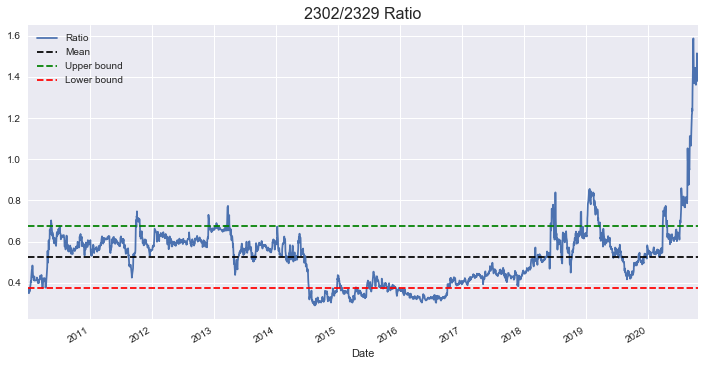

In [37]:
crit=1

plt.figure(figsize=(12,6))
plt.title('{}/{} Ratio'.format(stock_1,stock_2),fontsize=16)

Spread_Ratio.plot(label='Ratio')

plt.axhline(Spread_Ratio_Mean,label='Mean',ls='--',c='black')
plt.axhline(Spread_Ratio_Mean+crit*Spread_Ratio_Std,label='Upper bound',ls='--',c='g')
plt.axhline(Spread_Ratio_Mean-crit*Spread_Ratio_Std,label='Lower bound',ls='--',c='r');

plt.legend()

### 3-2. 移動窗格價差比例

#### <註6> 移動窗格估計

In [43]:
Spread_Ratio.rolling(5).sum()[:20]

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08    1.800078
2010-01-11    1.794925
2010-01-12    1.790111
2010-01-13    1.787930
2010-01-14    1.796639
2010-01-15    1.823741
2010-01-18    1.856895
2010-01-19    1.906960
2010-01-20    1.941015
2010-01-21    1.979493
2010-01-22    2.029940
2010-01-25    2.099065
2010-01-26    2.153041
2010-01-27    2.209075
2010-01-28    2.272824
2010-01-29    2.329868
dtype: float64

In [42]:
Spread_Ratio.rolling(5).mean()[:20]

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08    0.360016
2010-01-11    0.358985
2010-01-12    0.358022
2010-01-13    0.357586
2010-01-14    0.359328
2010-01-15    0.364748
2010-01-18    0.371379
2010-01-19    0.381392
2010-01-20    0.388203
2010-01-21    0.395899
2010-01-22    0.405988
2010-01-25    0.419813
2010-01-26    0.430608
2010-01-27    0.441815
2010-01-28    0.454565
2010-01-29    0.465974
dtype: float64

In [44]:
Spread_Ratio.rolling(5).quantiletile(0.5)[:20]

Date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08    0.361029
2010-01-11    0.358213
2010-01-12    0.356215
2010-01-13    0.356215
2010-01-14    0.358213
2010-01-15    0.364811
2010-01-18    0.368497
2010-01-19    0.376005
2010-01-20    0.391367
2010-01-21    0.402552
2010-01-22    0.403288
2010-01-25    0.406280
2010-01-26    0.426453
2010-01-27    0.458586
2010-01-28    0.460256
2010-01-29    0.460492
dtype: float64

In [45]:
window=60
crit=1

Spread_Ratio_MA = Spread_Ratio.rolling(window=window).mean()
Spread_Ratio_rolling_Std = Spread_Ratio.rolling(window=window).std()
upper_bound = Spread_Ratio_MA+crit*Spread_Ratio_rolling_Std
lower_bound = Spread_Ratio_MA-crit*Spread_Ratio_rolling_Std

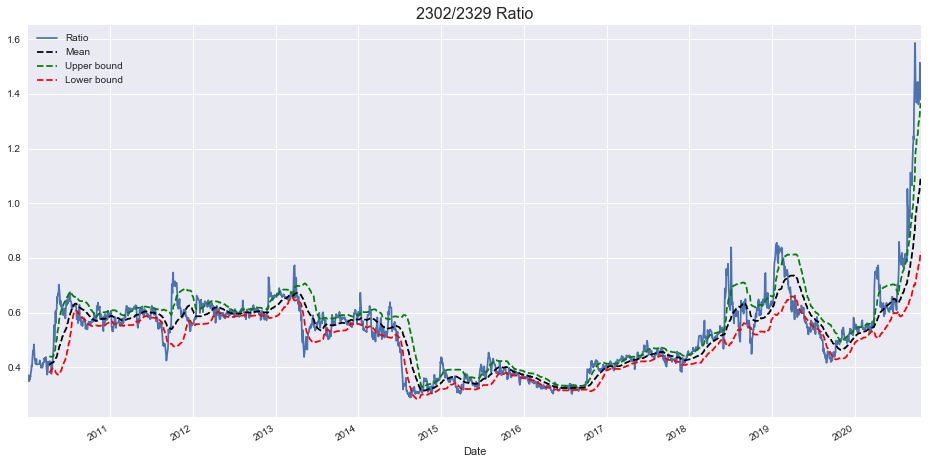

In [46]:
plt.figure(figsize=(16,8))
plt.title('{}/{} Ratio'.format(stock_1,stock_2),fontsize=16)

Spread_Ratio.plot(label='Ratio')
Spread_Ratio_MA.plot(label='Mean',ls='--',c='black')
upper_bound.plot(label='Upper bound',ls='--',c='g')
lower_bound.plot(label='Lower bound',ls='--',c='r');

plt.legend();

## 4. 回測

### 4-1. 產出訊號

In [47]:
#建立交易訊號
#穿過上通道時定義為放空投資組合
#穿過下通道時定義為買進投資組合
#建立一個list，當達成條件時append進-1與1

signal=[]


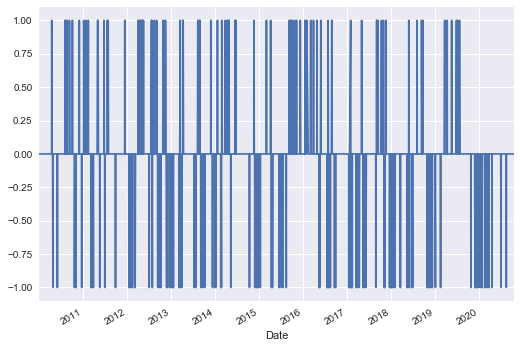

In [48]:
## 組成series
signal_df=pd.Series(signal,index=Spread_Ratio.index)

plt.figure(figsize=(8.5,6))
signal_df.plot()

### 4-2. 計算部位

In [49]:
position_df=signal_df.shift(1)

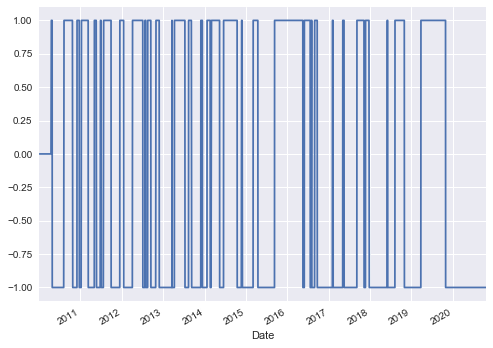

In [51]:
plt.figure(figsize=(8,6))
position_df.plot()

### 4-3. 計算交易股數

In [52]:
## 設定總資金，分兩半投入兩邊
## 計算每次"訊號"發生時兩邊要兩邊買幾張

wealth=1000000.0
trade_stock_df=pd.concat(
    [signal_df.shift(1)*(wealth/2/close_df[stock_1].shift(1)),-signal_df.shift(1)*(wealth/2/close_df[stock_2]).shift(1)]
    ,axis=1,keys=[stock_1,stock_2])

trade_stock_df.iloc[67:75]

,2302,2329
Date,,
2010-04-19,83681.642400,-31441.855255
2010-04-20,0.000000,-0.000000
2010-04-21,0.000000,-0.000000
2010-04-22,0.000000,-0.000000
2010-04-23,0.000000,-0.000000
2010-04-26,0.000000,-0.000000
2010-04-27,-72139.372109,34399.167682
2010-04-28,0.000000,-0.000000


### 4-4. 計算標的每日變化

In [54]:
## 計算每天股價變化
return_df=pd.concat([close_df[stock_1].diff(1),close_df[stock_2].diff(1)],axis=1,keys=[stock_1,stock_2])
return_df.iloc[67:75]

,2302,2329
Date,,
2010-04-19,-0.265560,-1.079369
2010-04-20,0.061969,-0.503640
2010-04-21,0.132771,-0.100786
2010-04-22,0.159343,0.014398
2010-04-23,0.416032,0.590029
2010-04-26,0.451447,-0.287766
2010-04-27,0.478001,-0.071991
2010-04-28,0.513416,-0.172679


# 可以用下面這條檢查有沒有寫錯訊號跟交易股數
## 如果是對的話應該要在出現訊號隔天出現交易股數

In [55]:
pd.concat([trade_stock_df,signal_df,position_df],axis=1).iloc[67:75]

,2302,2329,0,1
Date,,,,
2010-04-19,83681.642400,-31441.855255,0.0,1.0
2010-04-20,83681.642400,-31441.855255,0.0,1.0
2010-04-21,83681.642400,-31441.855255,0.0,1.0
2010-04-22,83681.642400,-31441.855255,0.0,1.0
2010-04-23,83681.642400,-31441.855255,0.0,1.0
2010-04-26,83681.642400,-31441.855255,-1.0,1.0
2010-04-27,-72139.372109,34399.167682,0.0,-1.0
2010-04-28,-72139.372109,34399.167682,0.0,-1.0


In [56]:
(return_df*trade_stock_df).iloc[67:75]

,2302,2329
Date,,
2010-04-19,-22222.469618,33937.351014
2010-04-20,5185.691149,15835.381479
2010-04-21,11110.456710,3168.905398
2010-04-22,13334.064347,-452.687920
2010-04-23,34814.267352,-18551.598957
2010-04-26,37777.787354,9047.881290
2010-04-27,-34482.666100,-2476.429338
2010-04-28,-37037.528812,-5940.012069


### 4-5. 計算投組每日變化

In [58]:
## 股價變化*持有部位 = 每日損益，且以.cumsum()來計算累積損益
## 建持有單一股票的累積損益和對沖損益df

trade_return_df=(return_df*trade_stock_df)
cum_trade_return_df=(return_df*trade_stock_df).cumsum()
cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)

cum_trade_return_df.iloc[67:75]

,2302,2329,Total Return
Date,,,
2010-04-19,-22222.469618,33937.351014,11714.881397
2010-04-20,-17036.778469,49772.732493,32735.954024
2010-04-21,-5926.321759,52941.637891,47015.316132
2010-04-22,7407.742589,52488.949971,59896.692559
2010-04-23,42222.009941,33937.351014,76159.360955
2010-04-26,79999.797295,42985.232305,122985.029600
2010-04-27,45517.131195,40508.802966,86025.934162
2010-04-28,8479.602384,34568.790898,43048.393281


### 4-5. 損益比較

Text(0.5, 1.0, 'Stock & Total Return')

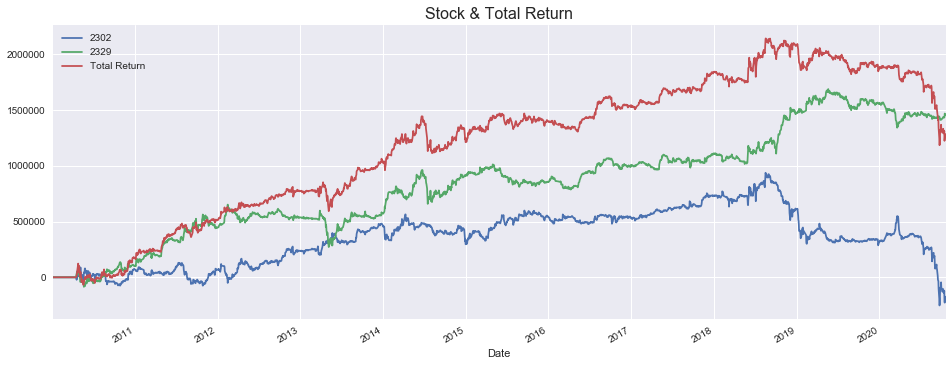

In [59]:
## 比較單獨持有和對沖持有的損益
fig,ax=plt.subplots(figsize=(16,6))

cum_trade_return_df.plot(label='Total Return',ax=ax)
plt.legend()
plt.title('Stock & Total Return',fontsize=16)

### 4-6. 計算累積報酬 (每次都用100萬當本金，不考慮現金收入)

Text(0.5, 1.0, 'Cumulative Return')

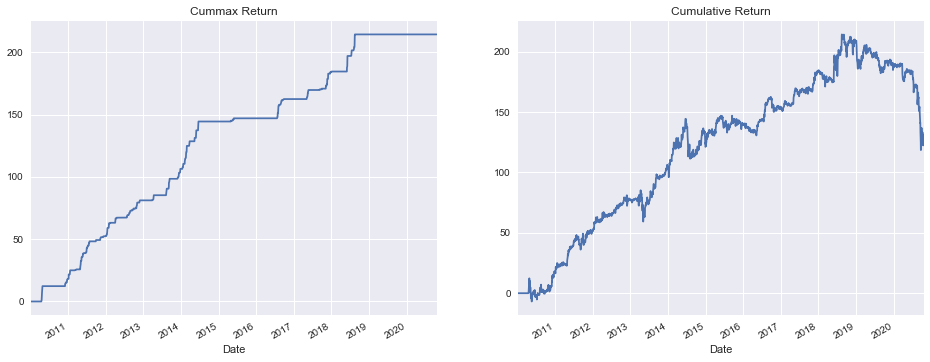

In [60]:
## 建累機報酬率的df
## 並且以.cummax()來計算累積報酬創高點

cum_trade_percent_return=(cum_trade_return_df['Total Return']/wealth)*100

fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
cum_trade_percent_return.cummax().plot()
plt.title('Cummax Return')
plt.subplot(1,2,2)
cum_trade_percent_return.plot()
plt.title('Cumulative Return')

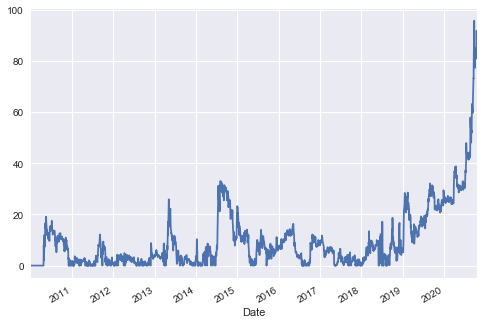

In [61]:
MDD_series=cum_trade_percent_return.cummax()-cum_trade_percent_return
MDD_series.plot()

In [62]:
high_index=cum_trade_percent_return[cum_trade_percent_return.cummax()==cum_trade_percent_return].index

### 4-7. 績效指標與畫圖

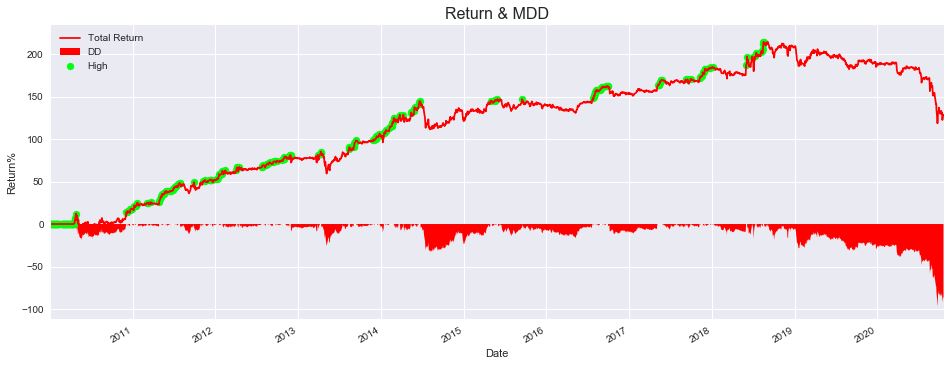

In [63]:
fig,ax=plt.subplots(figsize=(16,6))

(cum_trade_percent_return).plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD')
plt.scatter(high_index,cum_trade_percent_return.loc[high_index],c='#02ff0f',label='High')

plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD',fontsize=16);


In [64]:
MDD=round(MDD_series.max(),2)
Cumulative_Return=round(cum_trade_percent_return.iloc[-1],2)
Return_on_MDD=round(cum_trade_percent_return.iloc[-1]/MDD_series.max(),2)
daily_return=cum_trade_percent_return.diff(1)

print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))

Cumulative Return: 128.37%
MDD: 95.81%
Return on MDD: 1.34
Shapre Ratio: 0.51


In [65]:
abs(position_df.diff(1)).sum()*0.005650*100

71.755

## 5. 多種配對

In [66]:
pair_dict={}
pair_dict['pair_1']=['2302','2329']
pair_dict['pair_2']=['2302','2330']
pair_dict['pair_3']=['2303','2330']

In [67]:
pair_dict

{'pair_1': ['2302', '2329'],
 'pair_2': ['2302', '2330'],
 'pair_3': ['2303', '2330']}

In [68]:
for key,value in pair_dict.items():
    print(key,value)

pair_1 ['2302', '2329']
pair_2 ['2302', '2330']
pair_3 ['2303', '2330']


In [69]:
close_df

,2302,2303,2329,2330,2337
Date,,,,,
2010-01-04,6.222883,10.645722,17.125622,44.052135,26.497847
2010-01-05,5.975026,10.770967,16.549990,43.780632,26.203426
2010-01-06,6.054688,11.522430,16.334118,44.052135,26.350639
2010-01-07,5.842247,11.522430,16.406109,43.576996,25.982613
2010-01-08,5.824543,11.397185,16.693874,43.441250,25.835400
2010-01-11,5.851098,11.647675,16.334118,43.780632,25.614582
2010-01-12,5.895354,11.491119,16.549990,43.169735,26.497847
2010-01-13,5.886503,11.178008,15.974360,42.626728,26.350639
2010-01-14,6.090103,11.240632,16.693874,42.898228,26.350639


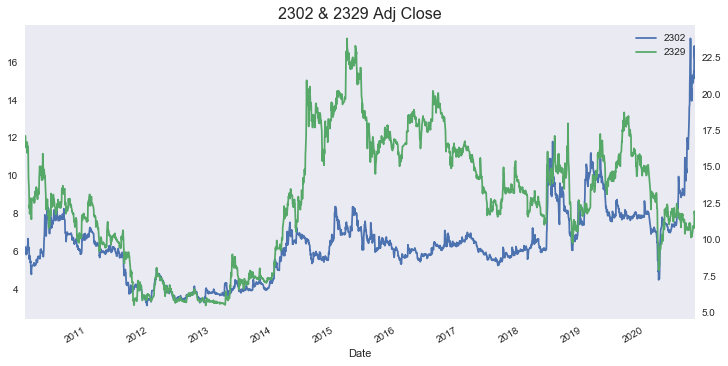

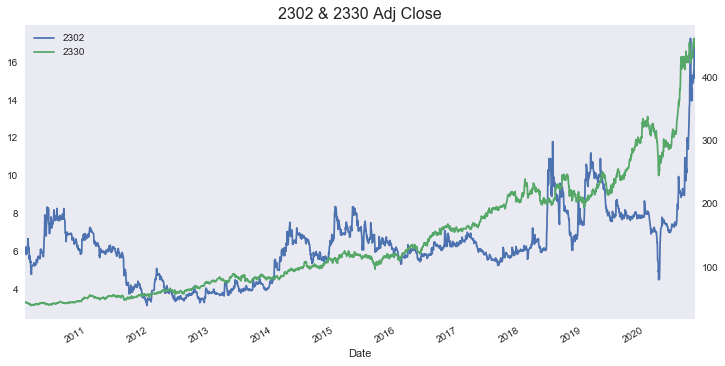

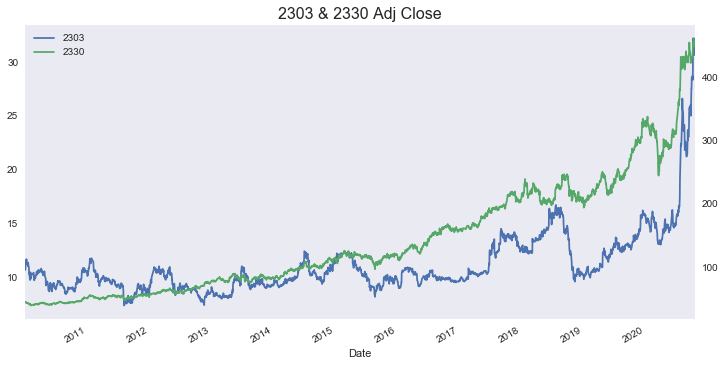

In [70]:
for key,value in pair_dict.items():
    plt.figure(figsize=(12,6))
    ax=close_df[value[0]].plot()
    ax2=close_df[value[1]].plot(secondary_y=True)
    plt.grid()
    lines = ax.get_lines() + ax2.get_lines()

    plt.legend(lines, [l.get_label() for l in lines])
    plt.title('{} & {} Adj Close'.format(value[0],value[1]),fontsize=16)

In [71]:
#建立價差序列字典
Spread_Ratio_dict={}

In [72]:
#計算價差比例
for key,value in pair_dict.items():
    Spread_Ratio=close_df[value[0]]/close_df[value[1]]
    Spread_Ratio_Mean=Spread_Ratio.mean()
    Spread_Ratio_Std=Spread_Ratio.std()
    Spread_Ratio_dict[key]=Spread_Ratio

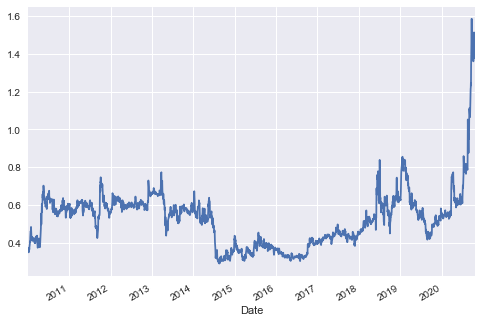

In [73]:
Spread_Ratio_dict['pair_1'].plot()

In [74]:
window=60
crit=1

Spread_Ratio_MA_dict={}
Spread_Ratio_rolling_Std_dict={}
upper_bound_dict={}
lower_bound_dict={}


for key,value in pair_dict.items():
    Spread_Ratio_MA_dict[key]=Spread_Ratio_dict[key].rolling(window=window).mean()
    Spread_Ratio_rolling_Std_dict[key]=Spread_Ratio_dict[key].rolling(window=window).std()
    
    upper_bound_dict[key]=Spread_Ratio_MA_dict[key]+crit*Spread_Ratio_rolling_Std_dict[key]
    lower_bound_dict[key]=Spread_Ratio_MA_dict[key]-crit*Spread_Ratio_rolling_Std_dict[key]

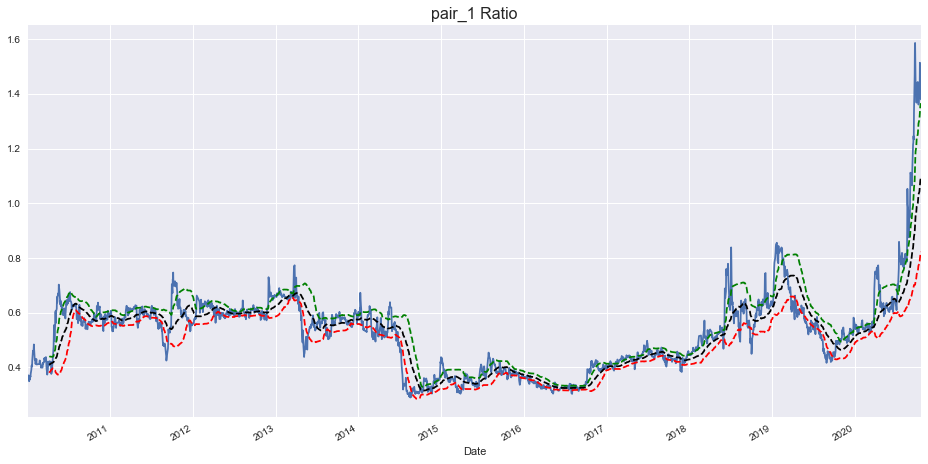

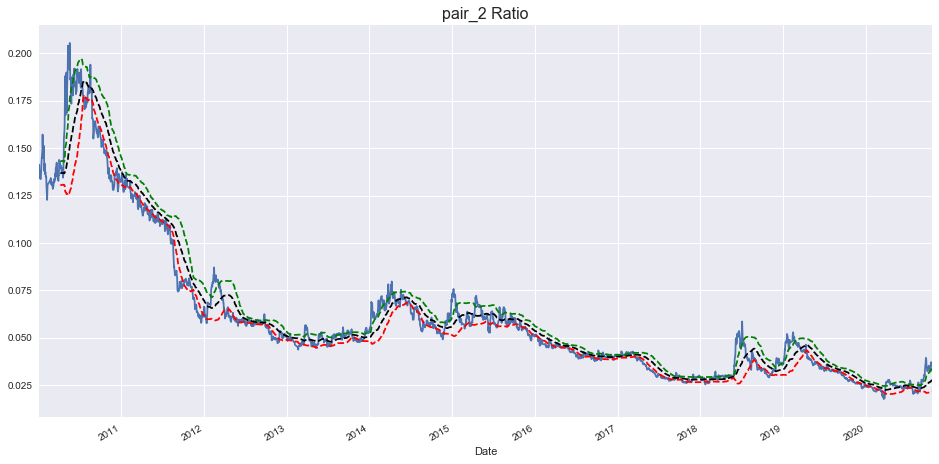

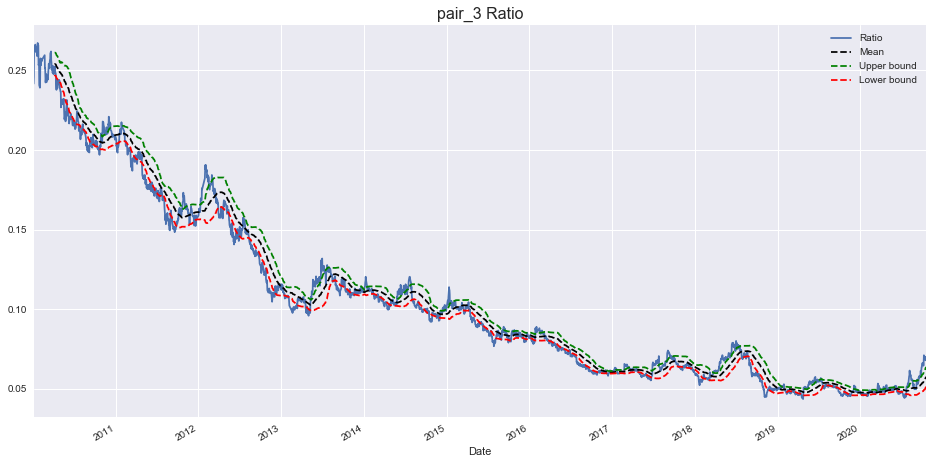

In [75]:
for key,value in pair_dict.items():
    plt.figure(figsize=(16,8))
    Spread_Ratio_dict[key].plot(label='Ratio')
    plt.title('{} Ratio'.format(key),fontsize=16);
    Spread_Ratio_MA_dict[key].plot(label='Mean',ls='--',c='black')
    upper_bound_dict[key].plot(label='Upper bound',ls='--',c='g')
    lower_bound_dict[key].plot(label='Lower bound',ls='--',c='r');

plt.legend();

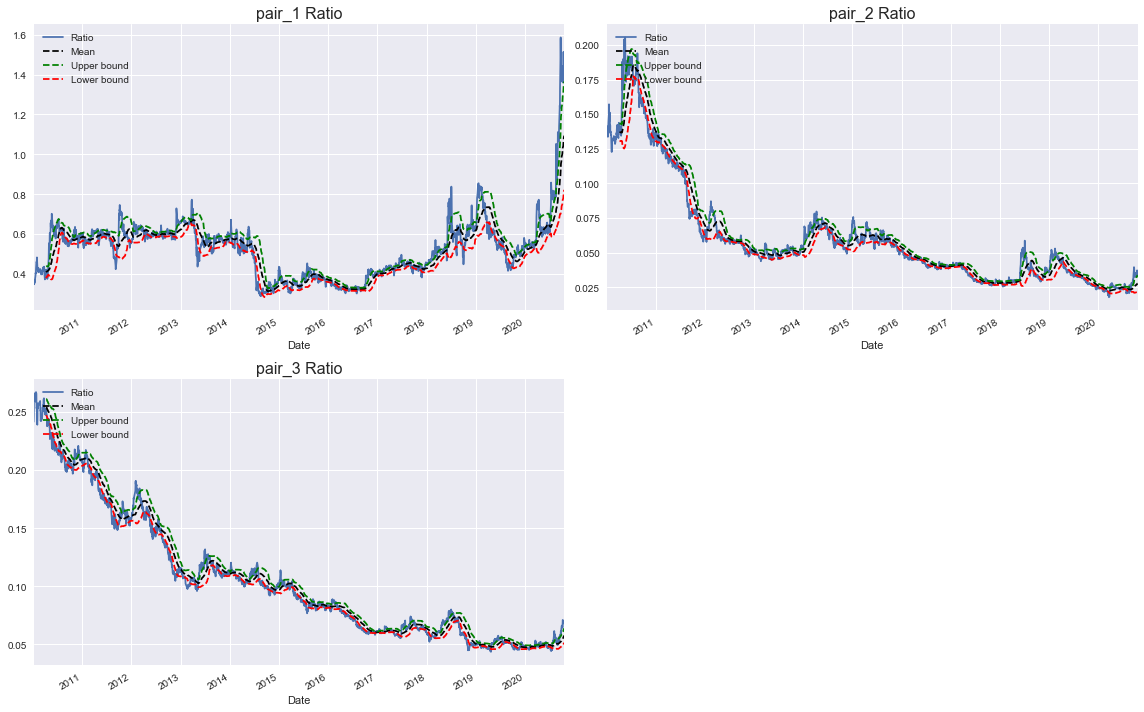

In [76]:
i=1
plt.figure(figsize=(16,10))
for key,value in pair_dict.items():
    plt.subplot(2,2,i)
    Spread_Ratio_dict[key].plot(label='Ratio')
    plt.title('{} Ratio'.format(key),fontsize=16);
    Spread_Ratio_MA_dict[key].plot(label='Mean',ls='--',c='black')
    upper_bound_dict[key].plot(label='Upper bound',ls='--',c='g')
    lower_bound_dict[key].plot(label='Lower bound',ls='--',c='r');
    i+=1
    plt.legend(loc=2)
plt.tight_layout()

In [77]:
signal_dict={}
for key,value in pair_dict.items():
    signal=[]
    #建立信號
    

    
    signal_df=pd.Series(signal,index=Spread_Ratio_dict[key].index)
    signal_dict[key]=signal_df

In [78]:
position_dict={}
for key,value in pair_dict.items():
    position_dict[key]=signal_dict[key].shift(1)

In [79]:
for key,value in pair_dict.items():
    #計算持有倉位
    
     

In [80]:
wealth=1000000

In [81]:
trade_return_dict={}
for key,value in pair_dict.items():
    trade_stock_df=pd.concat([signal_dict[key].shift(1)*(wealth/2/close_df[value[0]].shift(1)),-signal_dict[key].shift(1)*(wealth/2/close_df[value[1]]).shift(1)],axis=1,keys=[value[0],value[1]])
     #計算交易股數
        

            
    return_df=pd.concat([close_df[value[0]].diff(1),close_df[value[1]].diff(1)],axis=1,keys=[value[0],value[1]])

    trade_return_df=(return_df*trade_stock_df)
    cum_trade_return_df=(return_df*trade_stock_df).cumsum()
    cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)
    
    trade_return_dict[key]=cum_trade_return_df['Total Return']    

In [83]:
cum_trade_percent_return_dict={}
for key,value in pair_dict.items():
    cum_trade_percent_return_dict[key]=(trade_return_dict[key]/wealth)*100

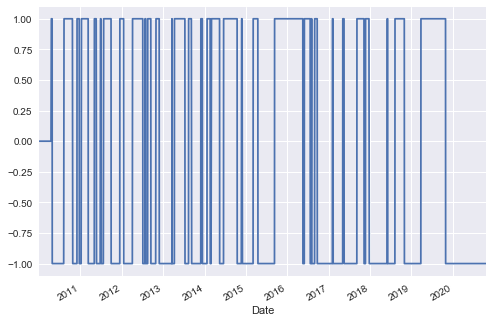

In [84]:
position_dict['pair_1'].plot()

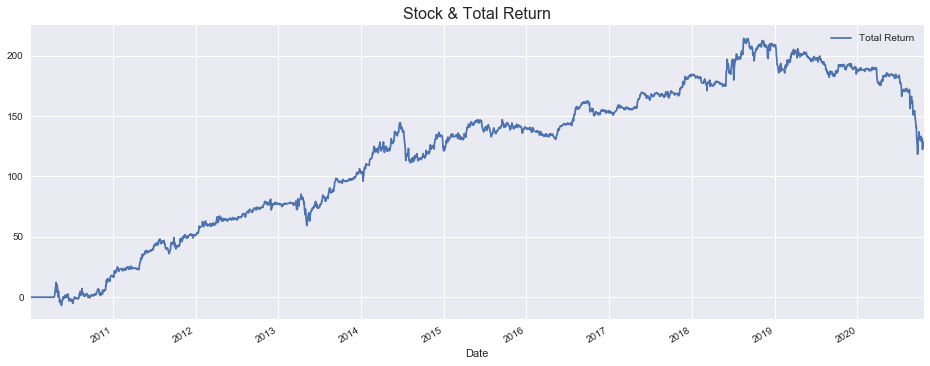

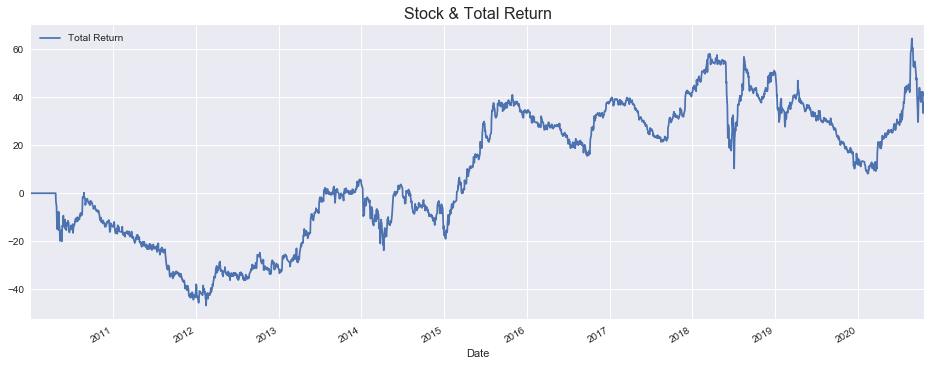

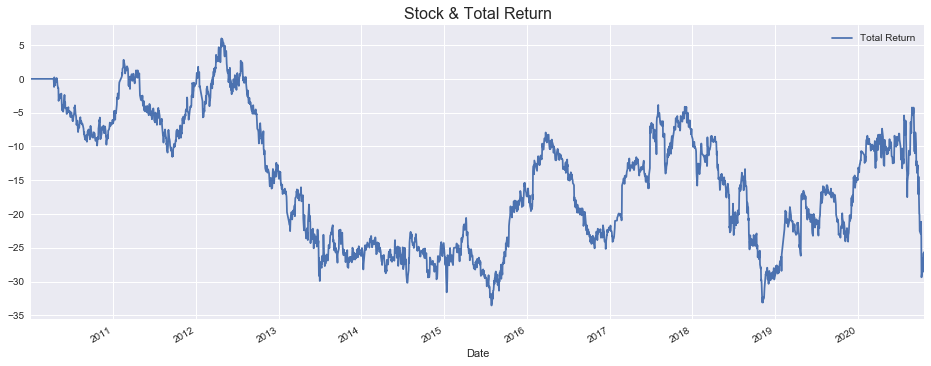

In [85]:
for key,value in pair_dict.items():
    fig,ax=plt.subplots(figsize=(16,6))
    cum_trade_percent_return_dict[key].plot(label='Total Return',ax=ax)
    plt.legend()
    plt.title('Stock & Total Return',fontsize=16);

In [86]:
MDD_series_dict={}
for key,value in pair_dict.items():
    MDD_series_dict[key]=cum_trade_percent_return_dict[key].cummax()-cum_trade_percent_return_dict[key]

In [87]:
high_index_dict={}
for key,value in pair_dict.items():
    high_index_dict[key]=cum_trade_percent_return_dict[key][cum_trade_percent_return_dict[key].cummax()==cum_trade_percent_return_dict[key]].index

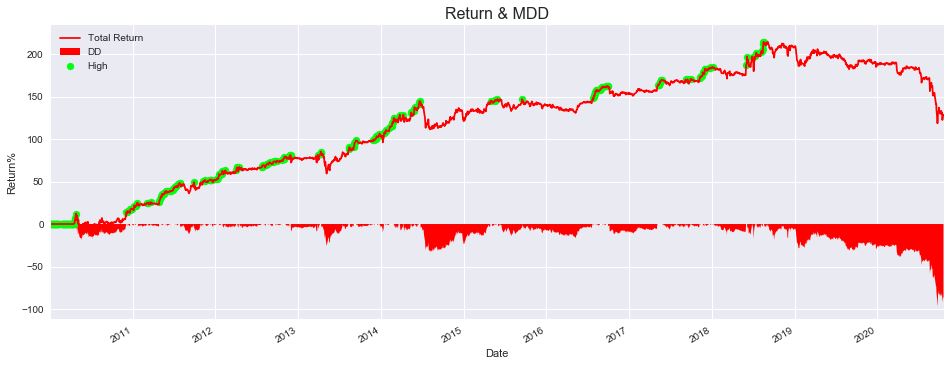

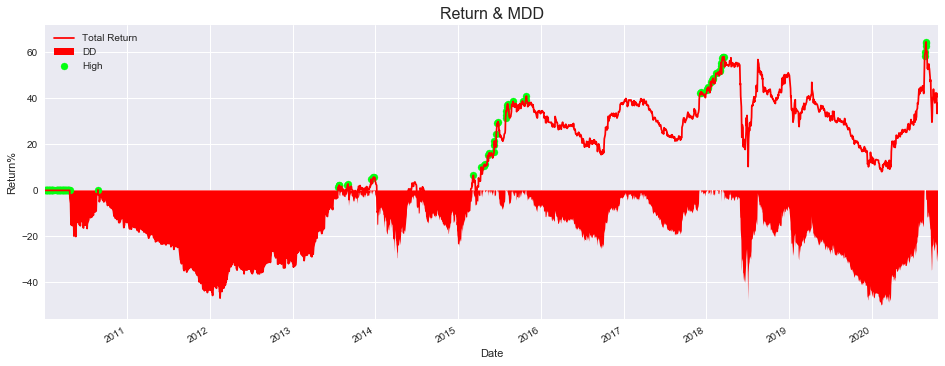

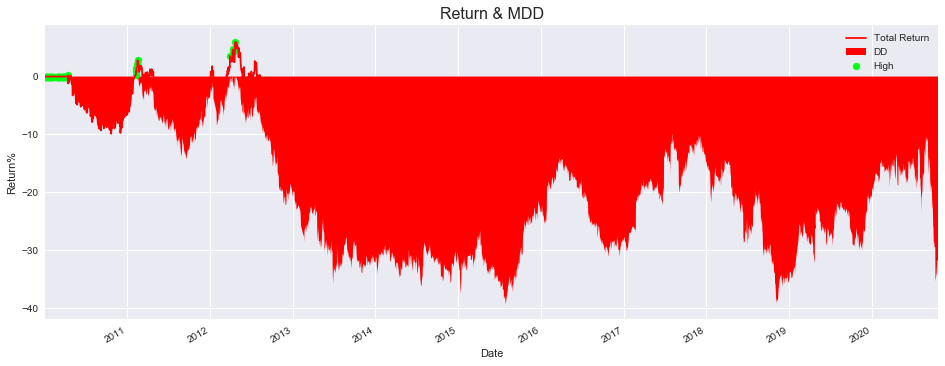

In [88]:
for key,value in pair_dict.items():
    fig,ax=plt.subplots(figsize=(16,6))

    (cum_trade_percent_return_dict[key]).plot(label='Total Return',ax=ax,c='r')
    plt.fill_between(MDD_series_dict[key].index,-MDD_series_dict[key],0,facecolor='r',label='DD')
    plt.scatter(high_index_dict[key],cum_trade_percent_return_dict[key].loc[high_index_dict[key]],c='#02ff0f',label='High')

    plt.legend()
    plt.ylabel('Return%')
    plt.xlabel('Date')
    plt.title('Return & MDD',fontsize=16);


In [89]:
for key,value in pair_dict.items():

    MDD=round(MDD_series_dict[key].max(),2)
    Cumulative_Return=round(cum_trade_percent_return_dict[key].iloc[-1],2)
    Return_on_MDD=round(cum_trade_percent_return_dict[key].iloc[-1]/MDD_series_dict[key].max(),2)
    daily_return=cum_trade_percent_return_dict[key].diff(1)
    print('{}\n{}/{}'.format(key,value[0],value[1]))
    print('Cumulative Return: {}%'.format(Cumulative_Return))
    print('MDD: {}%'.format(MDD))
    print('Return on MDD: {}'.format(Return_on_MDD))
    print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))
    print('')

pair_1
2302/2329
Cumulative Return: 128.37%
MDD: 95.81%
Return on MDD: 1.34
Shapre Ratio: 0.51

pair_2
2302/2330
Cumulative Return: 37.83%
MDD: 50.0%
Return on MDD: 0.76
Shapre Ratio: 0.16

pair_3
2303/2330
Cumulative Return: -25.65%
MDD: 39.51%
Return on MDD: -0.65
Shapre Ratio: -0.17



In [90]:
pd.DataFrame(cum_trade_percent_return_dict)

,pair_1,pair_2,pair_3
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000
2010-01-11,0.000000,0.000000,0.000000
2010-01-12,0.000000,0.000000,0.000000
2010-01-13,0.000000,0.000000,0.000000
2010-01-14,0.000000,0.000000,0.000000


In [93]:
total_return_df=pd.DataFrame(cum_trade_percent_return_dict)
total_return_df

,pair_1,pair_2,pair_3
Date,,,
2010-01-04,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000
2010-01-11,0.000000,0.000000,0.000000
2010-01-12,0.000000,0.000000,0.000000
2010-01-13,0.000000,0.000000,0.000000
2010-01-14,0.000000,0.000000,0.000000


## 6. 建立投組

In [94]:
#Equal Weighted組成投組
Portfolio_Return=(total_return_df/len(total_return_df.columns)).sum(axis=1)

In [95]:
MDD_series=Portfolio_Return.cummax()-Portfolio_Return
high_index=Portfolio_Return[Portfolio_Return.cummax()==Portfolio_Return].index

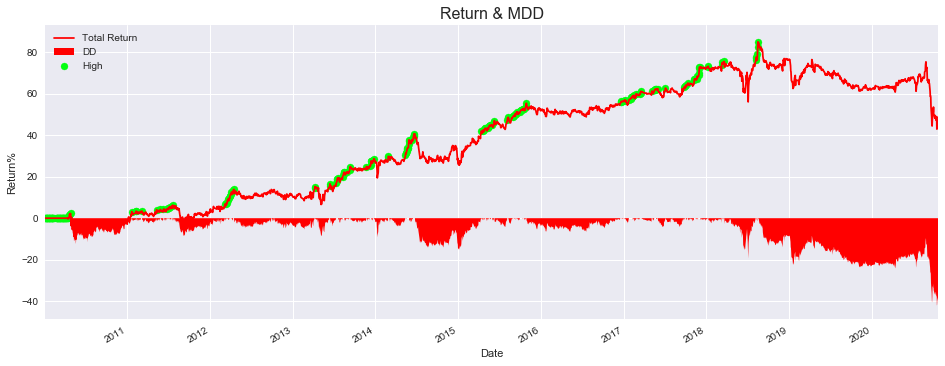

In [96]:
fig,ax=plt.subplots(figsize=(16,6))

(Portfolio_Return).plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD')
plt.scatter(high_index,Portfolio_Return.loc[high_index],c='#02ff0f',label='High')

plt.legend()
plt.ylabel('Return%')
plt.xlabel('Date')
plt.title('Return & MDD',fontsize=16);


In [97]:
MDD=round(MDD_series.max(),2)
Cumulative_Return=round(Portfolio_Return.iloc[-1],2)
Return_on_MDD=round(Portfolio_Return.iloc[-1]/MDD_series.max(),2)
daily_return=Portfolio_Return.diff(1)
print('Portfolio')
print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2)))
print('')

Portfolio
Cumulative Return: 46.85%
MDD: 42.11%
Return on MDD: 1.11
Shapre Ratio: 0.34

